<a href="https://colab.research.google.com/github/SB2507/The-Sparks-Foundation/blob/main/Task3EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



The Sparks Foundation

Task 3: Perform 'Exploratory Data Analysis' on 'SampleSuperstore' dataset 

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Data Source:https://drive.google.com/file/d/1IbMdpvAJ0u5KJqbsMjp8L2D8SeEpwms8/view?usp=sharing

Github link:https://github.com/SB2507/The-Sparks-Foundation/blob/main/Task3EDA.ipynb

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis

## Importing Libraries

In [77]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the Data

In [78]:
df=pd.read_csv("/content/drive/MyDrive/GRIP/SampleSuperstore.csv")

 .head() " returns first five observations of the dataset

In [79]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [80]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [81]:
df.shape

(9994, 13)

In [82]:
df.columns.values 

array(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity',
       'Discount', 'Profit'], dtype=object)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [84]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [85]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [86]:
df.duplicated().sum()

17

In [87]:
df[df.duplicated(keep=False)]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864


In [88]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [89]:
df.duplicated().sum()

0

In [90]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Visualization

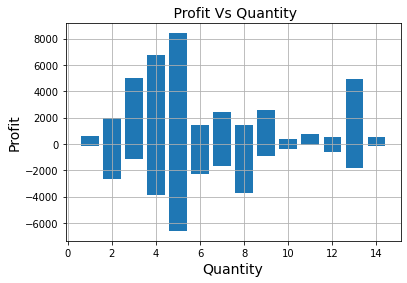

In [91]:
plt.bar(df['Quantity'], df['Profit'])
plt.title(' Profit Vs Quantity', fontsize=14)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.grid(True)
plt.show()

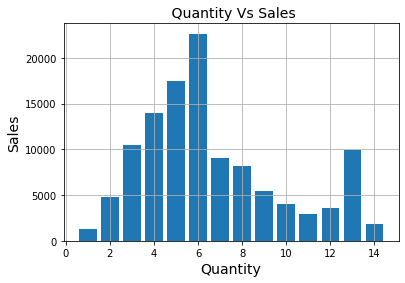

In [92]:
plt.bar(df['Quantity'], df['Sales'])
plt.title(' Quantity Vs Sales', fontsize=14)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.grid(True)
plt.show()

<Figure size 1152x432 with 0 Axes>

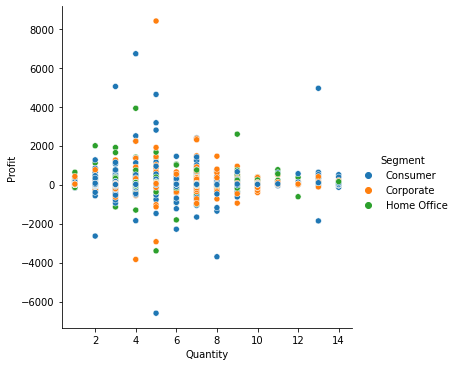

In [93]:
plt.figure(figsize=(16,6))

sns.relplot( x ='Quantity',y='Profit',color='purple',hue="Segment" , data=df )

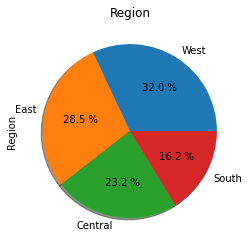

In [94]:
plt.title("Region")
df['Region'].value_counts().plot.pie(autopct ='% 1.1f %%', shadow = True);

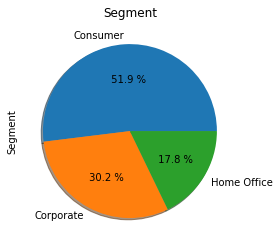

In [95]:
plt.title("Segment")
df['Segment'].value_counts().plot.pie(autopct ='% 1.1f %%', shadow = True);

In [96]:
plt.figure(figsize = [14.70, 8.27])
plt.subplots_adjust(wspace = 0.85)
sns.barplot(x = df1['City'], y = df['freq'], color = sns.color_palette()[9]);
plt.xlabel('City')
plt.ylabel('Count');

KeyError: ignored

<Figure size 1058.4x595.44 with 0 Axes>

In [ ]:
n_data=['Sales','Quantity','Discount','Profit']
plt.figure(figsize=(10,5))
sns.heatmap(df[n_data].corr(),annot=True, fmt='.4f',cmap='RdYlGn',center=0 );

In [ ]:
plt.figure(figsize=(20,16))
sns.pairplot(df, hue="Sub-Category") 
plt.show()

## Final Report
**1)The business is successful in New York City and Los Angeles**

**2)It needs to focus on Southern and Central part of the Country**

**3)It also needs to work on selling Home Office supplies**

**4)Most of the Postal Code Areas buy products less than 10k**

**5)States like Wyoming and West Virginia needs the attention of the business the most**